In [3]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
file = open("G3.p",'rb')
G1 = pickle.load(file)
file.close()
file = open("X3.p",'rb')
X = pickle.load(file)
file.close()
file = open("Y3.p",'rb')
y = pickle.load(file)
file.close()
file = open("index_changes_30.p",'rb')
index_changes = pickle.load(file)
file.close()

In [5]:
X = np.nan_to_num(X)
# X = X[:,0:2]

/Users/danqing0703/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/danqing0703/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


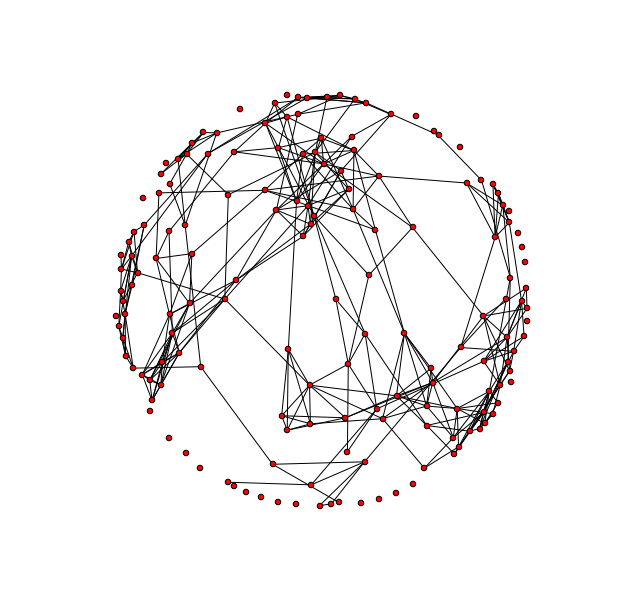

In [6]:
plt.figure(3,figsize=(8,8)) 
nx.draw(G1,node_size=30)

In [7]:
cd ../

/Users/danqing0703/Google_Drive/Berkeley/research/research_2016Fall/CDR_community_detection/code


In [8]:
# import model module
%load_ext autoreload
%autoreload 2
from __future__ import division
import random
# from snap import *
import numpy as np
import numpy.linalg as alg
import scipy as spy
import networkx as nx

import time
from itertools import *
import sys
import numpy.linalg as LA

from src.models.GibbsSampler_networkx import GibbsSampler
from src.models.ADMM import ADMM
from src.models.ADMM_networkx_weighted import ADMM_networkx_weighted
from src.models.CVX_weighted import CVX_weighted
from src.models.EM_CVX_pre import EM_CVX_pre
from scipy.special import expit
from __future__ import division

In [9]:
Lambda = 1
Rho = 1
Iterations = 30
num_classes = 2
burn_In = 50

In [10]:
# import model module
%load_ext autoreload
%autoreload 2
from src.models.EM_Latent_Class import EM_Latent_Class

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
index_change = index_changes[1]

In [19]:
G = G1

In [20]:
%load_ext autoreload
%autoreload 2
from __future__ import division
import random
# from snap import *
import numpy as np
import numpy.linalg as alg
import scipy as spy
import networkx as nx

import time
from itertools import *
import sys
import numpy.linalg as LA

from src.models.GibbsSampler_networkx import GibbsSampler
from src.models.ADMM import ADMM
from src.models.ADMM_networkx_weighted import ADMM_networkx_weighted
from src.models.CVX_weighted import CVX_weighted
pos_node = []
for NI in G.nodes_iter():
    G.node[NI]['pos_node_prob'] = 1
    pos_node.append(1)
count = 0
for EI in G.edges_iter():
    G[EI[0]][EI[1]]['pos_edge_prob'] = 1
    count += 1
y_old = np.copy(y)
y_2 = np.copy(y)
for i in range(len(index_change)):
    y_2[index_change[i]] = 0
Lambda = 10
Rho = 1
Iterations = 5
burn_In = 500

b = np.random.random((G.number_of_nodes(),1))
A = CVX_weighted(X, y_2, b,pos_node,G,Lambda, Rho)
A.init_P()
A.solve()
W = A.W
b = A.b
prob_mat = np.zeros((X.shape[0], 2))
print prob_mat.shape
prob_mat[:,0] = np.array(1/(1+np.exp(-(X.dot(W) + b)))).ravel()
prob_mat[:,1] = np.array(1 - 1/(1+np.exp(-(X.dot(W) + b)))).ravel()
prediction = prob_mat.argmax(axis=1)
count = 0
NN = prediction.shape[0]
for i in range(prediction.shape[0]):
    if i in index_change:
        if prediction[i] ==1 and y_old[i]==-1:
            count+=1
        elif prediction[i]==0 and y_old[i]==1:
            count+=1
            
print count/len(index_change)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(160, 2)
0.666666666667


In [21]:
(0.6 + 0.666666666667 + 0.7)/3

0.6555555555556667